# Udacity Project: Seattle’s Airbnb market - CRISP- DM Project 

## 1. Business Understanding

The AirBnB Dataset contains data about AirBnB listings in Seattle, calendar availability for each of these listings and user reviews for these listings. Using this dataset, I am going to attempt to answer the following business questions.

## 2. Data Exploratory

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
from IPython import display
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Changing Working Directory
os.chdir("C:/Users/LAHASU1/Projects in LAHASU1/2. UdaDS/5. Blog Post/Project")
os.getcwd()

'C:\\Users\\LAHASU1\\Projects in LAHASU1\\2. UdaDS\\5. Blog Post\\Project'

In [3]:
# Read in the calendar data set
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# Read in the reviews data set
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
# Assessing datasets
print("Size of dataframes, rows, columns \n", 
      "Calendar : ", df_calendar.shape, "\n",
      "Listings : ", df_listings.shape, "\n",
      "Reviews : ", df_reviews.shape,)

Size of dataframes, rows, columns 
 Calendar :  (1393570, 4) 
 Listings :  (3818, 92) 
 Reviews :  (84849, 6)


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### 2.1 Handling and Cleaning missing values 

In [8]:
# Create some extra features based on amenities
df_listings['Internet'] = df_listings.amenities.str.contains('internet|wireless', case=False)
df_listings['TV'] = df_listings.amenities.str.contains("tv", case=False)
df_listings['PetFriendly'] = df_listings.amenities.str.contains('pet|dog|cat', case=False)
df_listings['Washer'] = df_listings.amenities.str.contains('washer', case=False)
df_listings['Dryer'] = df_listings.amenities.str.contains('dryer', case=False)
df_listings['AirCond'] = df_listings.amenities.str.contains('air condition|air conditioning', case=False)

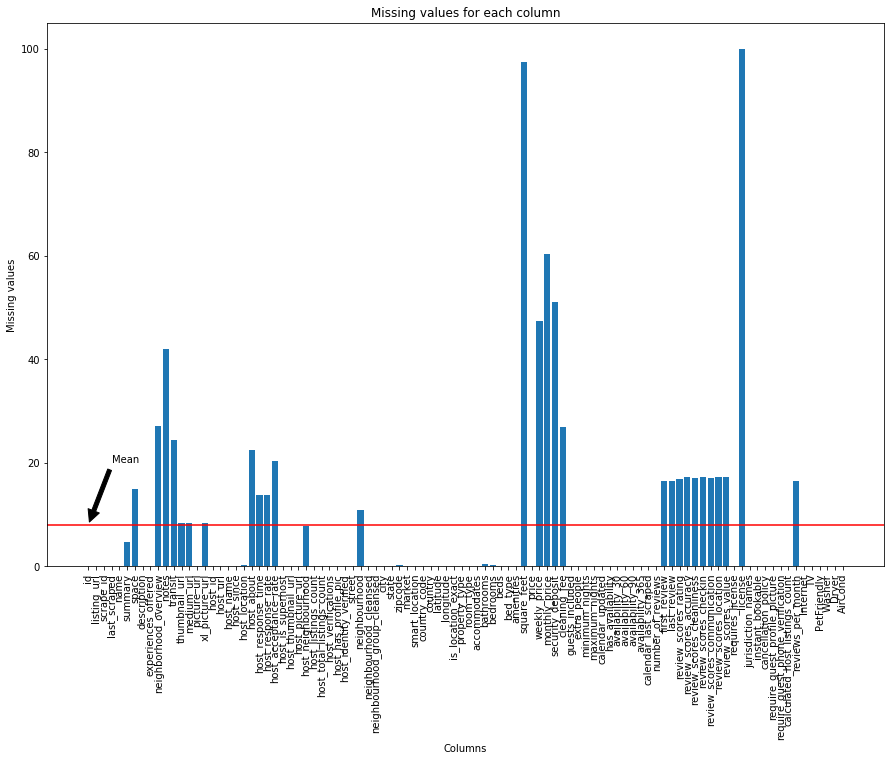

In [9]:
# Visualize missing values
missing_percent = [(df_listings[series].isnull().sum()/len(df_listings[series]))*100 for series in list(df_listings) ]
headers_missing = [series for series in list(df_listings)  ]

mean = np.mean(missing_percent)

fig, ax = plt.pyplot.subplots(figsize=(15,10))
plt.pyplot.title("Missing values for each column")
plt.pyplot.xlabel("Columns")
plt.pyplot.ylabel("Missing values")
plt.pyplot.axhline(y=mean, c='r', label='"Mean"')

ax.annotate('Mean', xy=(0, mean), xytext=(3, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),)

plt.pyplot.bar(headers_missing, missing_percent)
plt.pyplot.xticks(rotation=90);

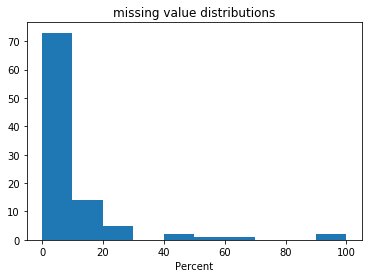

In [10]:
# Get a missing value distribution in order to set a cut-off point for missing values
plt.pyplot.title("missing value distributions")
plt.pyplot.xlabel("Percent")
plt.pyplot.hist(missing_percent);

- Note: Removing columns with more than 20 % missing values as it the jerk point

In [11]:
# Remove outlier columns
def remove_outlier_col(df, thresh):
    """
    Function to identify outlier columns. 
    Takes dataframe and outlier threshold as input, returns two lists. 
    First list identifies the columns and the second contains coresponding number of missing values
    """
    outlier_columns = []
    outlier_value = []
    for i in list(df):
        if ((df[i].isnull().sum() / len(df[i])) > thresh):
           
            outlier_columns.append(i)
            outlier_value.append(df[i].isnull().sum())
        
    return outlier_columns, outlier_value

In [12]:
outlier_col, outlier_value = remove_outlier_col(df_listings, 0.2)

In [13]:
for i in zip(outlier_col, outlier_value):
    print(i)

('neighborhood_overview', 1032)
('notes', 1606)
('transit', 934)
('host_about', 859)
('host_acceptance_rate', 773)
('square_feet', 3721)
('weekly_price', 1809)
('monthly_price', 2301)
('security_deposit', 1952)
('cleaning_fee', 1030)
('license', 3818)


In [14]:
df_listings.drop(outlier_col, axis=1, inplace=True)

### 2.2. Handling Categorical features

In [15]:
# Scrape_id contains the same values across all rows and host_listings_count is the same as host_total_listings_count
df_listings.drop(['scrape_id', 'host_listings_count'], axis=1, inplace=True)

In [16]:
list(df_listings.select_dtypes(include=['object']))

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [17]:
# Re-encoding some Categorical variables 

one_hot_encode = ['cancellation_policy', 'neighbourhood_group_cleansed', 'property_type', 'bed_type', 
                  'host_identity_verified', 'host_response_time', 'host_is_superhost',
                  'room_type', 'instant_bookable']
    
make_numeric = ['host_response_rate', 'price', 'extra_people' ]

In [18]:
# Convert to numeric values
df_listings.host_response_rate = df_listings.host_response_rate.str.replace("%", "")
df_listings.host_response_rate = pd.to_numeric(df_listings.host_response_rate)

df_listings.price = df_listings.price.str.replace("$", "")
df_listings.price = df_listings.price.str.replace(",", "")
df_listings.price = pd.to_numeric(df_listings.price)

df_listings.extra_people = df_listings.extra_people.str.replace("$", "")
df_listings.extra_people = pd.to_numeric(df_listings.extra_people);

In [19]:
list(df_listings.select_dtypes(include=['object']));

In [20]:
drop_num = ['id', 'host_id', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_communication', 'review_scores_location', 'review_scores_checkin','review_scores_value', 
            'reviews_per_month', 'calculated_host_listings_count']

drop_object = [i for i in list(df_listings.select_dtypes(include=['object'])) if i not in make_numeric + one_hot_encode]

In [21]:
df_listings.drop(drop_num + drop_object, axis=1, inplace=True)

In [22]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
host_response_time              3295 non-null object
host_response_rate              3295 non-null float64
host_is_superhost               3816 non-null object
host_total_listings_count       3816 non-null float64
host_identity_verified          3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
property_type                   3817 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
bed_type                        3818 non-null object
price                           3818 non-null float64
guests_included                 3818 non-null int64
extra_people                    3818 non-null float64
minimum_nights                  3818 non

### 2.3 Visualizing correlations through heatmap

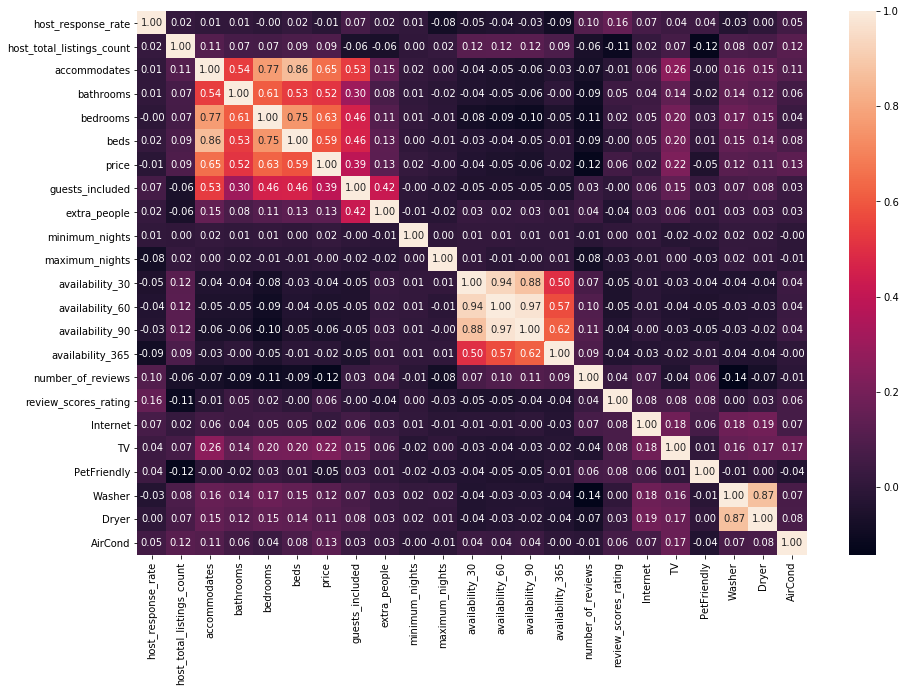

In [23]:
fig, ax = plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(df_listings.corr(), annot=True, fmt='.2f');

- As we can see in the heatmap, some of these features correlate very high
- We need to drop features that are correlated to make model robust and factors are independent of each other
- Removing columns with more than 60 % co-relation

In [24]:
highcorr = ['beds', 'bedrooms', 'availability_60', 'availability_90', 'availability_365', 'Dryer']

df_listings.drop(highcorr, axis=1, inplace=True)

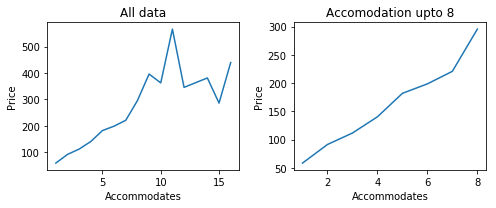

In [25]:
accom = pd.DataFrame(df_listings.groupby("accommodates")['price'].mean(), columns=['price'])

f,a = plt.pyplot.subplots(figsize=(7,3))
plt.pyplot.subplot(1,2,1)
plt.pyplot.title("All data")
plt.pyplot.ylabel("Price")
plt.pyplot.xlabel("Accommodates")
plt.pyplot.plot(accom)

plt.pyplot.subplot(1,2,2)
plt.pyplot.title("Accomodation upto 8")
plt.pyplot.ylabel("Price")
plt.pyplot.xlabel("Accommodates")
plt.pyplot.plot(accom[:8])

plt.pyplot.tight_layout();

- "Accommodates" feature was highly correlated with price but the data is not proportional after value = 8 and looks like an outlier
- Hence, taking the cut-off point of 8 people

In [26]:
# Drop listings that can accommodate more than 8 people
df_listings = df_listings[df_listings.accommodates <= 8]

### Revised Heatmap

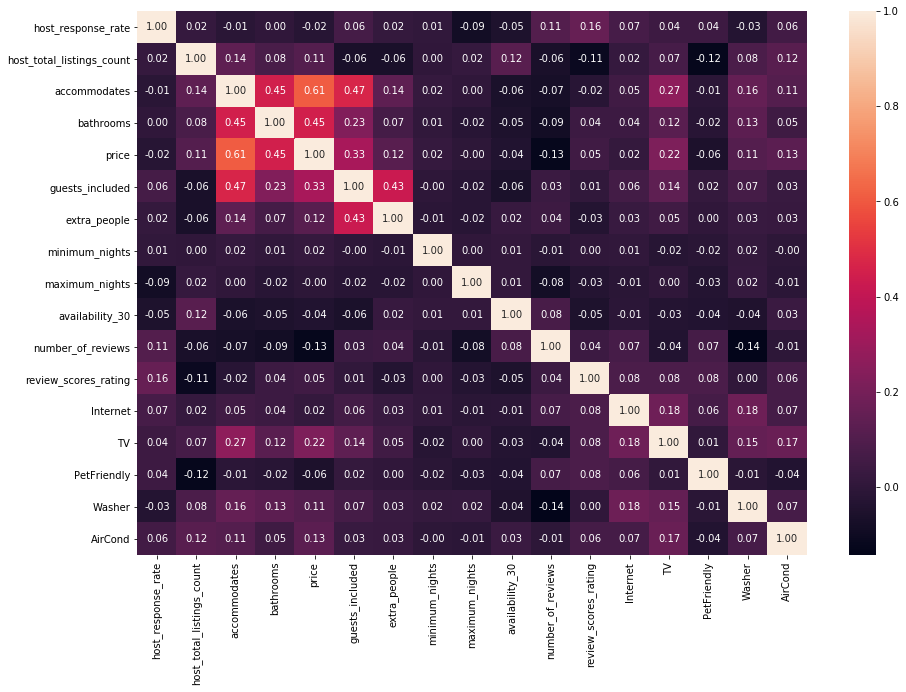

In [27]:
fig, ax = plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(df_listings.corr(), annot=True, fmt='.2f');

## 3. Descreptive Statistics and Business Questions answered
### 3.1 How does Price is affected by Geography?

In [28]:
# Mean listings price per neigbourhood
neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False))
neighbourhood['# counts'] = df_listings.neighbourhood_group_cleansed.value_counts()
neighbourhood

,price,# counts
neighbourhood_group_cleansed,,
Magnolia,166.600000,55
Downtown,152.388258,528
Queen Anne,149.314879,289
Cascade,140.101124,89
West Seattle,138.181818,198
Central Area,123.047222,360
Capitol Hill,122.230631,555
Ballard,118.964444,225
Other neighborhoods,117.512723,786


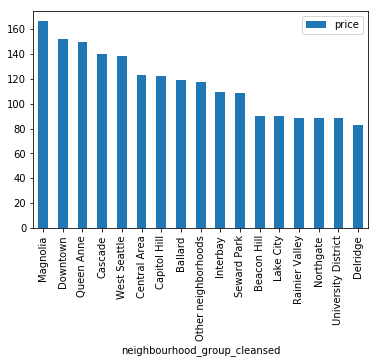

In [29]:
# Plotting it in a bar
price_by_neigh = df_listings.groupby(['neighbourhood_group_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
price_by_neigh.plot(kind='bar');

### FINDINGS

- Above chart shows, neighbourhood definitely has a say on the pricing. Magnolia is pricest of all neighborhoods at $ 167

- While Delridge is cheapest at $ 83 average price

### 3.2 Does price has any seasonality effect?

In [30]:
df_calendar.shape

(1393570, 4)

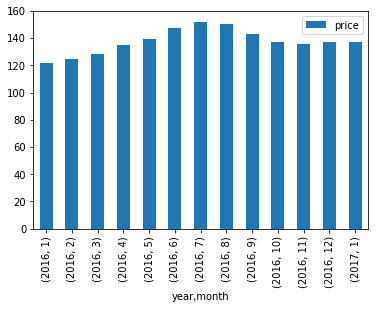

In [31]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

### FINDINGS

- Above chart shows, June to August are peak seasons which can be because nice summer months in Seattle
- Similarly, in early part of year due to chilly winters, the prices seems to take a dive, as the travelling must be very low

### 3.3 Does price fluctuate by weekends and weekdays?

In [32]:
import datetime  
import calendar

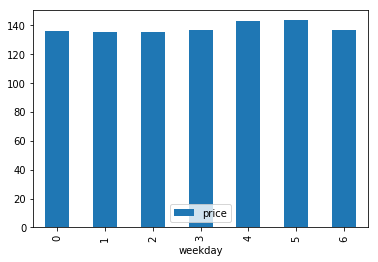

In [33]:
# Creating weekday variable
#WeekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

df_calendar['weekday'] = pd.DatetimeIndex(df_calendar['date']).weekday

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['weekday'])[['price']].mean().plot(kind="bar");

### FINDINGS

- We also observe weekends are highest priced for obvious reasons of higher possibility of tourist leading to higher demand (4 and 5 corresponds to Saturday and Sunday)

### 3.4 What are the key factors for high reviews?

- In the heatmap  we observe that "review_score_rating" is sightly corelated to "host_response_rate", which is quite likely

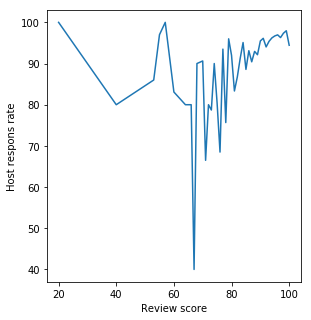

In [34]:
# visulizing the relationship between resonse rate and review score
host = pd.DataFrame(df_listings.groupby('review_scores_rating')['host_response_rate'].mean())
plt.pyplot.subplots(figsize=(10,5))
plt.pyplot.title("Response rate vs review score")
plt.pyplot.subplot(1,2,1)
plt.pyplot.plot(host)
plt.pyplot.ylabel("Host respons rate")
plt.pyplot.xlabel("Review score");

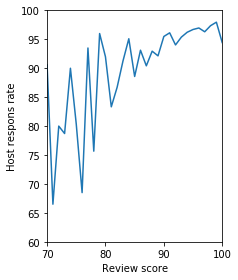

In [35]:
# Sub-plotting data under 70 to see the fluctuations
plt.pyplot.subplot(1,2,2)
plt.pyplot.plot(host)
plt.pyplot.ylabel("Host respons rate")
plt.pyplot.xlabel("Review score")
plt.pyplot.xlim(70,100)
plt.pyplot.ylim(60,100)

plt.pyplot.tight_layout()

### FINDINGS

- Laying down as theory, # of property listings can affect ratings, as more no of queries will come, and repsonse rate will go down

- Bathrooms and Ameneties also draw higher ratings, which is quite obvious

Thus to lay down few factors guiding ratings are:

1. Not have too many listings
2. High Response on every query
3. Include ammenities like parking space, TV and Internet

## 4. Price Prediction with ML techniques

In [36]:
# One hot encode categorical features before machine learning
listings_enc = pd.get_dummies(df_listings, drop_first=True);

In [37]:
# Split dataset into subsets for different handling of missing values
full_df = listings_enc.dropna().copy()

imputed_df = listings_enc.copy()
for col in imputed_df:
    imputed_df[col].fillna(imputed_df[col].value_counts().index[0], inplace=True)

In [38]:
# Length of each dataset
print("Length full_df : ", len(full_df),
      "Length of imputed_df : ", len(imputed_df))

Length full_df :  2794 Length of imputed_df :  3753


In [39]:
# Split into targets and features
target = full_df.price.copy()
features = full_df.drop('price', axis=1).copy()

target_imp = imputed_df.price.copy()
features_imp = imputed_df.drop('price', axis=1).copy()

In [40]:
# Split to training set and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(features_imp, target_imp, test_size=0.25)

In [41]:
y_train.shape

(2095,)

### 4.1 ADAboost

In [42]:
param_dist = {
 'n_estimators': [500, 2000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

adamodel = RandomizedSearchCV(AdaBoostRegressor(), param_distributions = param_dist, cv=3, n_iter = 20, n_jobs=-1);
                              
adamodel.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [500, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [43]:
y_pred = adamodel.predict(X_test_imp)

In [44]:
r2_score(y_test_imp, y_pred)

0.5181687837694032

### R2 Score for AdaBoost

- imputed_df = 0.45


### 4.2 SVM

In [46]:
scaler = preprocessing.StandardScaler()

scaled_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)
scaled_x_imp = scaler.fit_transform(X_train_imp)
test_x_imp = scaler.transform(X_test_imp)

In [47]:
param_dist_svm = {
 'kernel': ['linear', 'rbf', 'poly'],
 'C' : [0.001,0.05,0.1]

 }

svmmodel = GridSearchCV(svm.SVC(), param_grid=param_dist_svm )
svmmodel.fit(scaled_x_imp, y_train_imp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
svmpred = svmmodel.predict(test_x_imp)
r2_score(y_test_imp, svmpred)

0.16083249079009876

### R2 Score for AdaBoost

- imputed_df = 0.35

### 4.3 Randomforest

In [49]:
from scipy.stats import randint
# specify parameters and distributions to sample from
param_dist = {"max_depth": randint(3,15),
              "n_estimators" : [100, 1000],
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "min_samples_leaf" : randint(1,10)
                            }
n_iter_search = 20
randommodel = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
randommodel.fit(X_train_imp, y_train_imp);

In [50]:
pred = randommodel.predict(X_test_imp)

In [51]:
r2_score(y_test_imp, pred)

0.5326630177979379

### R2 Score for AdaBoost

- imputed_df = 0.53

### 5. Conclusion

The best estimate of price prediction comes from:

Model | R2 Score      | Rank
--- | --- | --- 
AdaBoost       |45 %           |2
SVM           |35 %           | 3
Random Forest |53 %           | 1


- Hence it can be concluded that Random Forest can explain atleast 53% pf price variance.
- Adding more features to the dataset on the standard of room can help us predict the price better